In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import linalg
from sklearn.decomposition import PCA
import seaborn as sns


%matplotlib inline 

In [2]:
scan_0 = pd.read_csv("./Landmarks/scan 0.csv")
scan_1 = pd.read_csv("./Landmarks/scan 1.csv")
scan_2 = pd.read_csv("./Landmarks/scan 2.csv")
scan_3 = pd.read_csv("./Landmarks/scan 3.csv")
scan_4 = pd.read_csv("./Landmarks/scan 4.csv")
scan_5 = pd.read_csv("./Landmarks/scan 5.csv")
scan_6 = pd.read_csv("./Landmarks/scan 6.csv")
scan_7 = pd.read_csv("./Landmarks/scan 7.csv")
scan_8 = pd.read_csv("./Landmarks/scan 8.csv")
scan_9 = pd.read_csv("./Landmarks/scan 9.csv")
scan_10 = pd.read_csv("./Landmarks/scan 10.csv")
scan_11 = pd.read_csv("./Landmarks/scan 11.csv")
scan_12 = pd.read_csv("./Landmarks/scan 12.csv")
scan_13 = pd.read_csv("./Landmarks/scan 13.csv")
scan_14 = pd.read_csv("./Landmarks/scan 14.csv")
scan_15 = pd.read_csv("./Landmarks/scan 15.csv")
scan_16 = pd.read_csv("./Landmarks/scan 16.csv")
scan_17 = pd.read_csv("./Landmarks/scan 17.csv")
scan_18 = pd.read_csv("./Landmarks/scan 18.csv")
scan_19 = pd.read_csv("./Landmarks/scan 19.csv")
scan_20 = pd.read_csv("./Landmarks/scan 20.csv")
scan_21 = pd.read_csv("./Landmarks/scan 21.csv")
scan_22 = pd.read_csv("./Landmarks/scan 22.csv")
scan_23 = pd.read_csv("./Landmarks/scan 23.csv")
scan_24 = pd.read_csv("./Landmarks/scan 24.csv")
scan_25 = pd.read_csv("./Landmarks/scan 25.csv")
scan_26 = pd.read_csv("./Landmarks/scan 26.csv")
scan_27 = pd.read_csv("./Landmarks/scan 27.csv")
scan_28 = pd.read_csv("./Landmarks/scan 28.csv")
scan_29 = pd.read_csv("./Landmarks/scan 29.csv")
scan_30 = pd.read_csv("./Landmarks/scan 30.csv")
scan_31 = pd.read_csv("./Landmarks/scan 31.csv")
scan_32 = pd.read_csv("./Landmarks/scan 32.csv")
scan_33 = pd.read_csv("./Landmarks/scan 33.csv")
scan_34 = pd.read_csv("./Landmarks/scan 34.csv")
scan_35 = pd.read_csv("./Landmarks/scan 35.csv")
scan_36 = pd.read_csv("./Landmarks/scan 36.csv")
scan_37 = pd.read_csv("./Landmarks/scan 37.csv")
scan_38 = pd.read_csv("./Landmarks/scan 38.csv")
scan_39 = pd.read_csv("./Landmarks/scan 39.csv")
scan_40 = pd.read_csv("./Landmarks/scan 40.csv")
scan_41 = pd.read_csv("./Landmarks/scan 41.csv")
scan_42 = pd.read_csv("./Landmarks/scan 42.csv")
scan_43 = pd.read_csv("./Landmarks/scan 43.csv")
scan_44 = pd.read_csv("./Landmarks/scan 44.csv")
scan_45 = pd.read_csv("./Landmarks/scan 45.csv")
scan_46 = pd.read_csv("./Landmarks/scan 46.csv")
scan_47 = pd.read_csv("./Landmarks/scan 47.csv")
scan_48 = pd.read_csv("./Landmarks/scan 48.csv")
scan_49 = pd.read_csv("./Landmarks/scan 49.csv")

In [3]:
scan_total = [scan_0,scan_1,scan_2,scan_3,scan_4,scan_5,scan_6,scan_7,scan_8,scan_9,
        scan_10,scan_11,scan_12,scan_13,scan_14,scan_15,scan_16,scan_17,scan_18,scan_19,
        scan_20,scan_21,scan_22,scan_23,scan_24]

In [4]:
# change unit
for i in range(len(scan_total)):
    scan_total[i] = scan_total[i] / 25.4

In [5]:
mean_scan = [scan_25,scan_26,scan_27,scan_28,scan_29,scan_30,scan_31,scan_32,scan_33,scan_34,
             scan_35,scan_36,scan_37,scan_38,scan_39,scan_40,scan_41,scan_42,scan_43,scan_44,
             scan_45,scan_46,scan_47,scan_48,scan_49]

In [6]:
# change unit to mm
for i in range(len(mean_scan)):
    mean_scan[i] = mean_scan[i] / 25.4

In [7]:
from scipy.linalg import helmert
def procrustes_distance(landmarks, mean):
    sum_dis = 0
    for i in range(len(landmarks)):
        sum_dis += np.linalg.norm(landmarks[i][['X','Y','Z']]-mean) ** 2
    return sum_dis

def opr(X_1, X_2):
    # Ordinary Procrustes registration involve only rotation.
    # Rotate X_1 onto X_2
    reg_mat = np.matmul(X_2.T, X_1) / (np.linalg.norm(X_1)*np.linalg.norm(X_2))
    V, Λ, U_t = np.linalg.svd(reg_mat)
    Γ = np.matmul(U_t.T, V.T)
    return Γ

def ppa(landmarks):
    # Partial Procrustes registration algorithm for landmarks.
    
    ## Step 1: Center the landmarks
    size = len(landmarks[0])
    for i in range(len(landmarks)):
        x = np.mean(landmarks[i]['X'])
        y = np.mean(landmarks[i]['Y'])
        z = np.mean(landmarks[i]['Z'])
        landmarks[i][['X', 'Y', 'Z']] = landmarks[i] - np.array([x, y, z])

        
    
    ## Step 2: Initialize μ
    for i in range(len(landmarks)):
        if i == 0:
            sum_pts = landmarks[0][['X','Y','Z']]
        else:
            sum_pts += landmarks[i][['X', 'Y','Z']]
            
    μ = sum_pts / len(landmarks)
    
    ## Step 3: Remove rotation
    step = 0
    test = True
    while test:
        step+=1
#         print(step)
        distance = procrustes_distance(landmarks,μ)
        
        for i in range(len(landmarks)):
            Γ = opr(landmarks[i][['X','Y','Z']].values, μ.values)
            landmarks[i][['X','Y','Z']] = np.matmul(landmarks[i][['X','Y','Z']], Γ)
        
        for i in range(len(landmarks)):
            if i == 0:
                sum_pts = landmarks[0][['X','Y','Z']]
            else:
                sum_pts += landmarks[i][['X', 'Y','Z']]
            
        μ = sum_pts / len(landmarks)
        
        temp_dist = procrustes_distance(landmarks, μ)
        if (abs(distance - temp_dist) < 0.0001):
            test = False

    return landmarks, μ
    
def procrustes_measure(landmark, mean):
    return np.linalg.norm(landmark[['X','Y','Z']]-mean[['X','Y','Z']]) ** 2



In [8]:
def calculate_mean(configs):
    sums = 0
    for i in range(len(configs)):
        sums += configs[i]
    return sums / (len(configs))

In [9]:
# Process Planning
def sumsquares(configs, mean):
    Sx = 0
    Sy = 0
    Sz = 0
    num_scans = len(configs)
    for i in range(num_scans):
        Sx += (configs[i]['X'].values - mean['X'].values)**2
        Sy += (configs[i]['Y'].values - mean['Y'].values)**2
        Sz += (configs[i]['Z'].values - mean['Z'].values)**2
        
    return {'Sx': Sx, 'Sy': Sy, 'Sz': Sz, 'num_scans': num_scans}

def process_planning(ss, δ = 0.01, ts = 0.01, tp = 0, q=2):
    q = q**2
    ts_sq = tp**2 + ts**2
    s = ss['num_scans']
    Sx = ss['Sx']
    Sy = ss['Sy']
    Sz = ss['Sz']
    a = 3 - q * (Sx + Sy + Sz) / (s * δ**2)
    b = q * ts_sq / (δ**2)
    n = (- a + np.sqrt(a**2 + 4 * b)) / 2
    n = np.max(np.ceil(n))
    return n

In [10]:
# Difference criteria
def max_dev(sample_mean, true_design):
    x_diff = (sample_mean["X"] - true_design["X"])**2
    y_diff = (sample_mean["Y"] - true_design["Y"])**2
    z_diff = (sample_mean["Z"] - true_design["Z"])**2
    max_diff = np.max(np.sqrt(x_diff+y_diff+z_diff))
    return(max_diff)

In [11]:
_, μ_true = ppa(mean_scan)
dist_total = []
sample = list(range(25))


In [12]:
# Process planning
result = pd.DataFrame({"s":[], "n":[]})

scans = []
for i in range(len(scan_total)):
    scans.append(scan_total[len(scan_total) - i - 1])
    
    if (i == 0):
        continue
    else:
        scans, mean = ppa(scans)
        ss = sumsquares(scans, mean)
        
        n = process_planning(ss, δ = 0.05, ts=0.05)
        
        this_loop = pd.DataFrame({"s":[i+1], "n":[n]})
        result = result.append(this_loop)

In [13]:
result

,s,n
0,2.0,2.0
0,3.0,2.0
0,4.0,2.0
0,5.0,2.0
0,6.0,2.0
0,7.0,2.0
0,8.0,2.0
0,9.0,2.0
0,10.0,2.0
0,11.0,2.0


In [14]:
# Process planning
result = pd.DataFrame({"s":[], "n":[]})

scans = []
for i in range(len(scan_total)):
    scans.append(scan_total[i])
    
    if (i == 0):
        continue
    else:
        scans, mean = ppa(scans)
        ss = sumsquares(scans, mean)
        
        n = process_planning(ss, δ = 0.03, ts=0.05)
        
        this_loop = pd.DataFrame({"s":[i+1], "n":[n]})
        result = result.append(this_loop)

In [15]:
result

,s,n
0,2.0,18.0
0,3.0,14.0
0,4.0,12.0
0,5.0,10.0
0,6.0,9.0
0,7.0,8.0
0,8.0,7.0
0,9.0,6.0
0,10.0,6.0
0,11.0,6.0


In [16]:
# Process planning
result = pd.DataFrame({"s":[], "n":[]})

scans = []
for i in range(len(scan_total)):
    scans.append(scan_total[i])
    
    if (i == 0):
        continue
    else:
        scans, mean = ppa(scans)
        ss = sumsquares(scans, mean)
        
        n = process_planning(ss, δ = 0.01, ts=0.05)
        
        this_loop = pd.DataFrame({"s":[i+1], "n":[n]})
        result = result.append(this_loop)

In [17]:
result

,s,n
0,2.0,178.0
0,3.0,144.0
0,4.0,118.0
0,5.0,101.0
0,6.0,87.0
0,7.0,76.0
0,8.0,69.0
0,9.0,63.0
0,10.0,58.0
0,11.0,53.0


In [18]:
# Process planning
result = pd.DataFrame({"s":[], "n":[]})

scans = []
for i in range(len(scan_total)):
    scans.append(scan_total[i])
    
    if (i == 0):
        continue
    else:
        scans, mean = ppa(scans)
        ss = sumsquares(scans, mean)
        
        n = process_planning(ss, δ = 0.005, ts=0.05)
        
        this_loop = pd.DataFrame({"s":[i+1], "n":[n]})
        result = result.append(this_loop)

In [19]:
result

,s,n
0,2.0,718.0
0,3.0,581.0
0,4.0,478.0
0,5.0,407.0
0,6.0,351.0
0,7.0,307.0
0,8.0,279.0
0,9.0,255.0
0,10.0,233.0
0,11.0,213.0


In [95]:
_, μ_true = ppa(mean_scan)
result = pd.DataFrame({"s": [], "MaxDev":[], "Procrustes":[]})

for ii in range(30):
    rands = np.random.permutation(25)
    this_scan = []
    for l in rands:
        this_scan.append(scan_total[l])
        
    scans = []
    
    for i in range(25):
        scans.append(this_scan[i])
        
        if (i == 0):
            (this_scan[i], ideal), _ = ppa((this_scan[i], μ_true))
            procrustes = procrustes_measure(this_scan[i], μ_true)
            maxdev = max_dev(this_scan[i], μ_true)
            this_loop = pd.DataFrame({"s":[i+1], "MaxDev":[maxdev], "Procrustes": [procrustes]})
        else:
            
            scans, _ = ppa(scans)
            mean = calculate_mean(scans)
            (mean, μ_true), _ = ppa((mean, μ_true))
            procrustes = procrustes_measure(mean, μ_true)
            maxdev = max_dev(mean, μ_true)
            this_loop = pd.DataFrame({"s":[i+1], "MaxDev":[maxdev], "Procrustes": [procrustes]})
            
        result = result.append(this_loop)


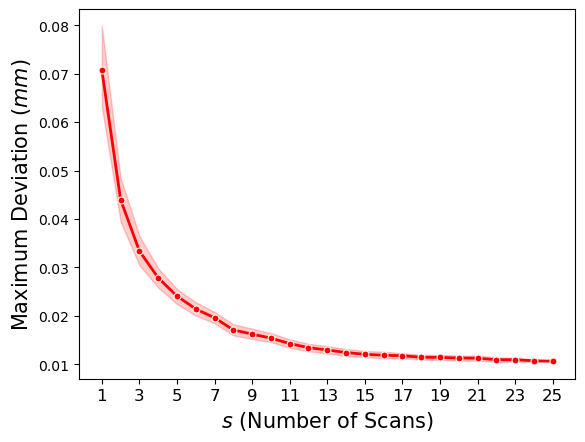

In [99]:
plt.style.use("default")
g = sns.lineplot(
    data=result,
    x="s", y="MaxDev",
    marker='o', linewidth=2,markersize=5, color="red"
)

plt.xticks(np.arange(1, np.max(result['s']) + .1, step=2), fontsize=12)
plt.xlabel("$s$ (Number of Scans)", fontsize=15)
plt.ylabel("Maximum Deviation ($mm$)", fontsize=15)

plt.savefig("Maximum Deviation Plot (freeform).png", dpi=600)

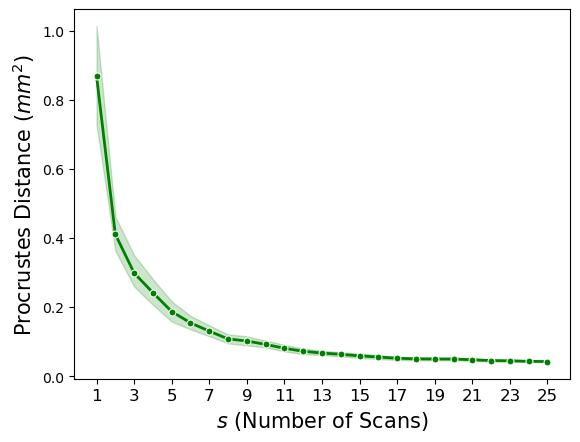

In [100]:
plt.style.use("default")
g = sns.lineplot(
    data=result,
    x="s", y="Procrustes",
    marker='o', linewidth=2,markersize=5, color="green"
)

plt.xticks(np.arange(1, np.max(result['s']) + .1, step=2), fontsize=12)
plt.xlabel("$s$ (Number of Scans)", fontsize=15)
plt.ylabel("Procrustes Distance ($mm^2$)", fontsize=15)

plt.savefig("Procrustes Distance Plot (freeform).png", dpi=600)